## Loan Prediction 

#### Predicting if the person will get a loan or not 

#### Importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('E:\ML projects\Workspace\dataset\loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df=df.drop(['Loan_ID'],axis=1)

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
categorical_data = [i for i in df.columns if df[i].dtype=="object"]

In [12]:
categorical_data

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [13]:
numerical_data = [i for i in df.columns if df[i].dtype!="object"]

In [14]:
numerical_data

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [16]:
discrete_numerical_data = [i for i in numerical_data if len(df[i].unique())<16]

In [17]:
discrete_numerical_data

['Loan_Amount_Term', 'Credit_History']

In [19]:
continuous_numerical_data = [i for i in numerical_data if len(df[i].unique())>=16]
continuous_numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

#### Exploratory Data Analysis

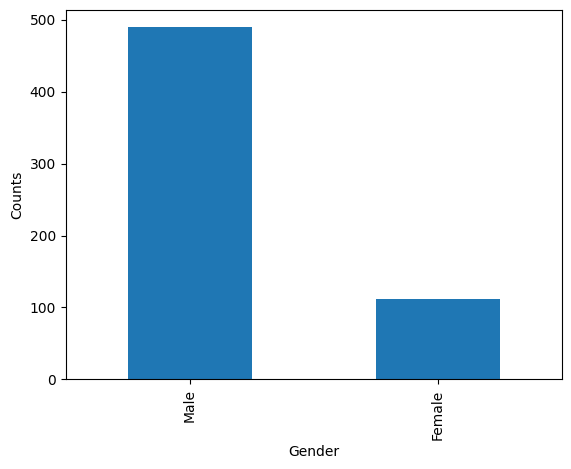

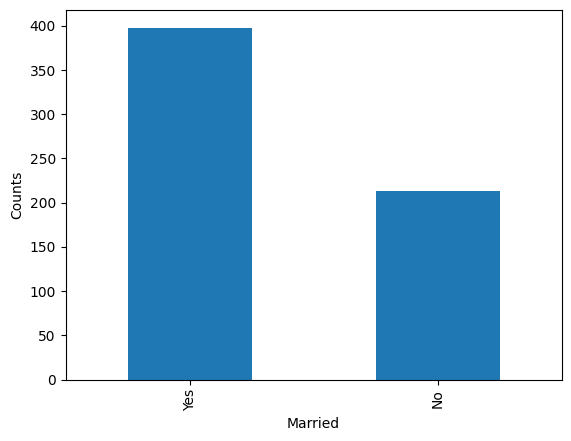

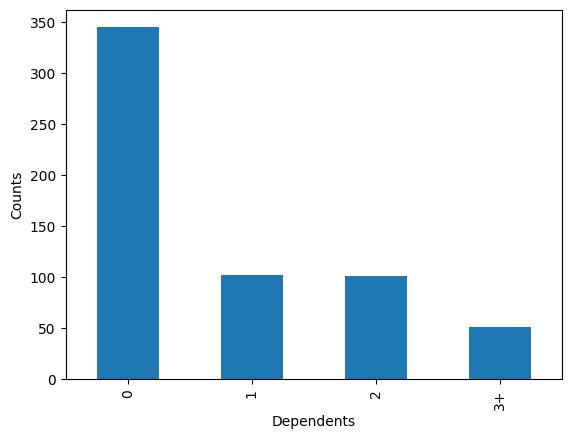

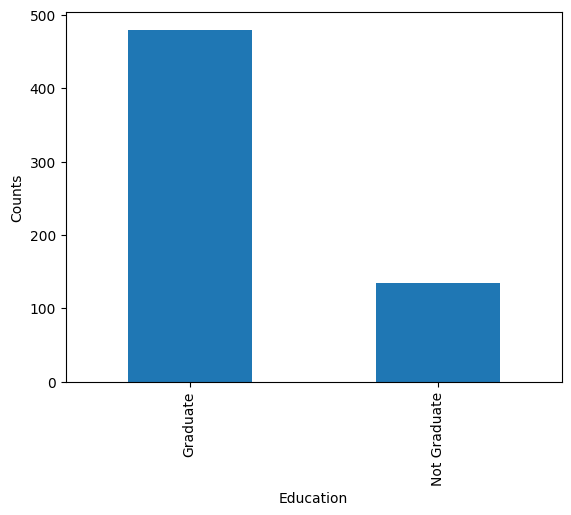

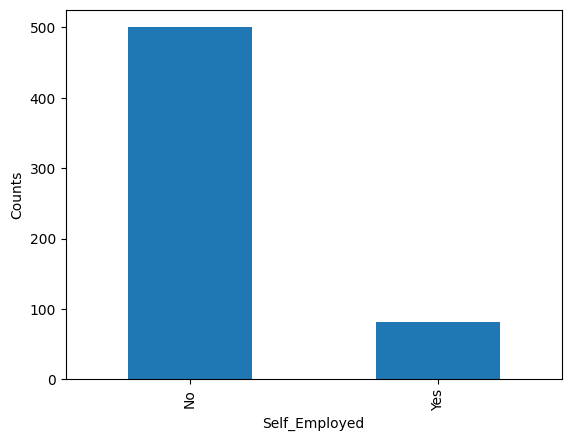

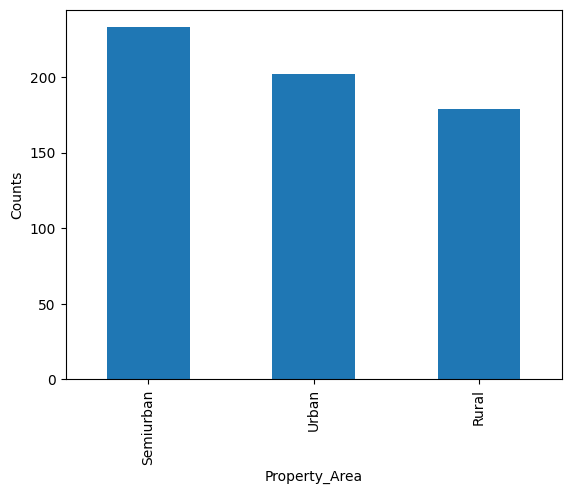

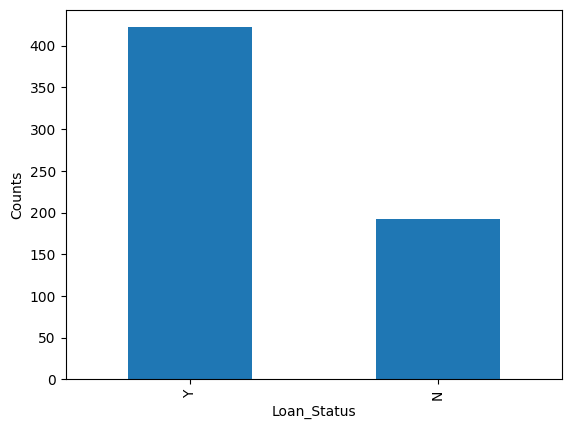

In [20]:
# For Categotical Data.
for i in categorical_data:
    df[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

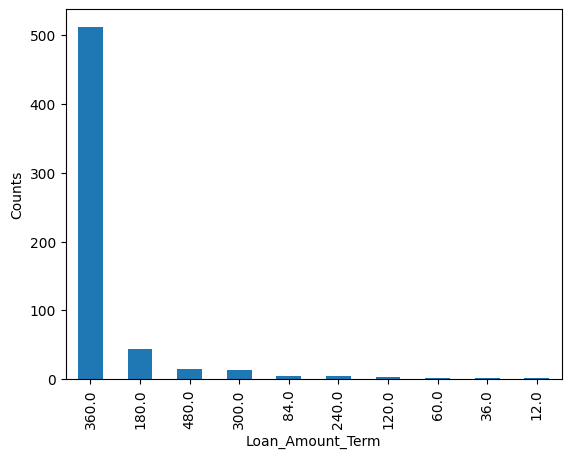

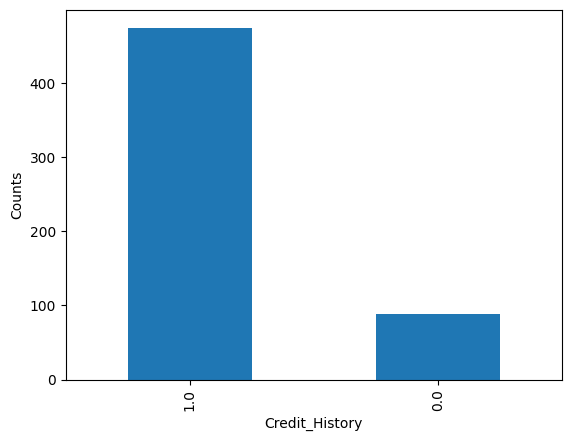

In [21]:
# For Discrete Numerical Data
for i in discrete_numerical_data:
    df[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

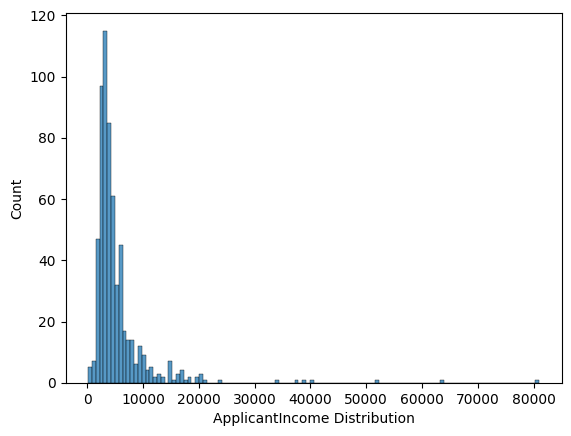

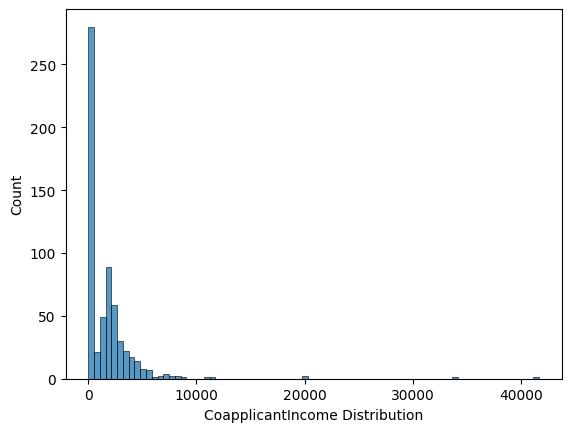

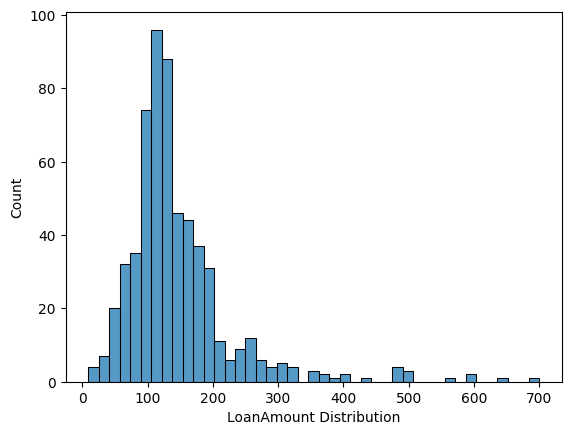

In [22]:
# For Continuous Numerical Data
for i in continuous_numerical_data:
    sns.histplot(df[i])
    plt.xlabel(i+" Distribution")
    plt.show()

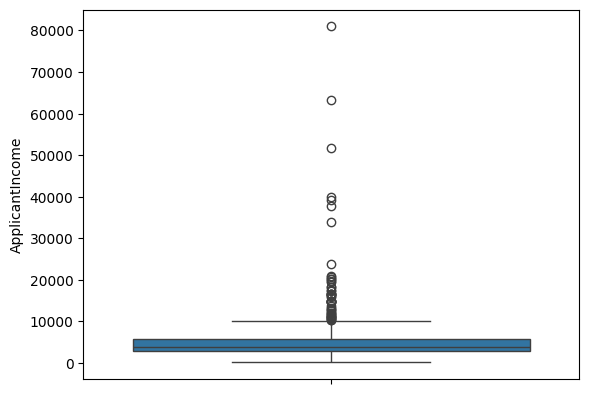

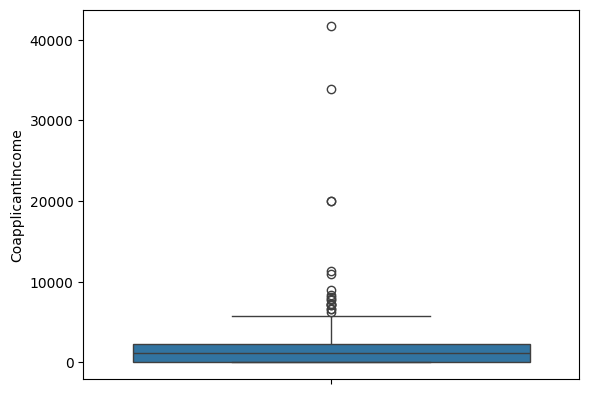

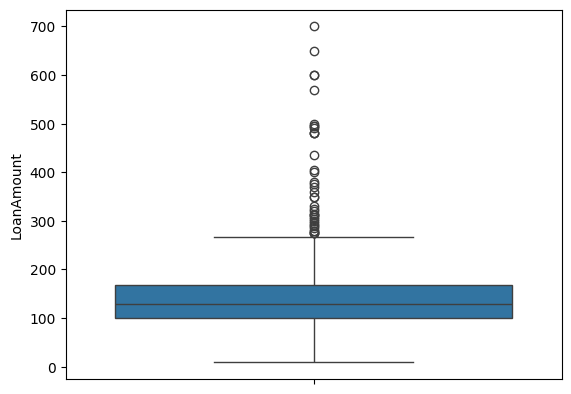

In [23]:
# Check for outliers(Since the above distribution graphs are skewed, hence outliers are present
for i in continuous_numerical_data:
    sns.boxplot(data = df, y=i)
    plt.show()

#### Handling the missing values

<Axes: >

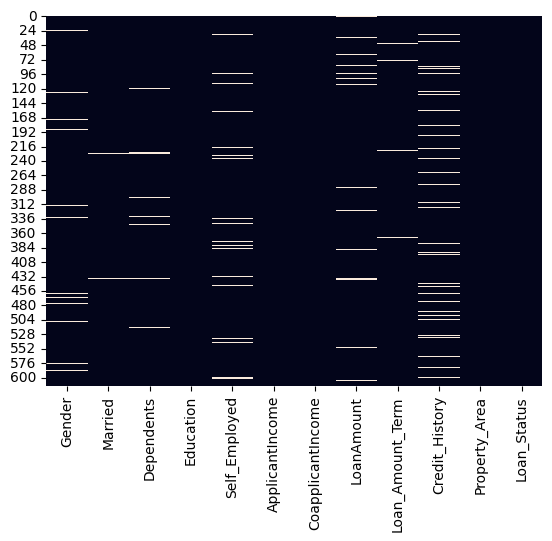

In [24]:
sns.heatmap(df.isnull(),cbar=False)

In [25]:

# Since there are null values in categorical values and discrete numerical values, so we replace them with mode of that feature.
for i in categorical_data+discrete_numerical_data:
    df[i] = df[i].fillna(df[i].mode().iloc[0])

In [26]:
# Now We replace the loan amount column from numerical category.
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

<Axes: >

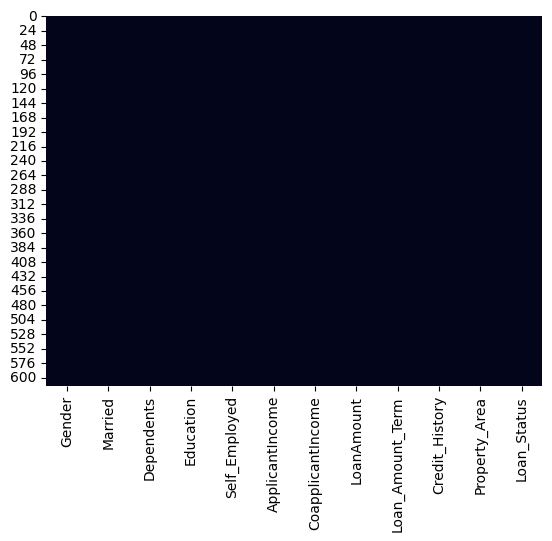

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [30]:
df[numerical_data].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


#### Feature Engineering

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
for i in categorical_data:
    df[i]=le.fit_transform(df[i])

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [34]:
df["TotalIncome"] = df["ApplicantIncome"]+df["CoapplicantIncome"]

In [35]:
df.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

In [36]:
continuous_numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [37]:
continuous_numerical_data.remove("ApplicantIncome")
continuous_numerical_data.remove("CoapplicantIncome")
continuous_numerical_data.append("TotalIncome")

In [38]:
continuous_numerical_data

['LoanAmount', 'TotalIncome']

In [39]:
# Log Transformation
for i in continuous_numerical_data+["Loan_Amount_Term"]:
    df[i] = np.log(df[i])

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,4.852030,5.886104,1.0,2,1,8.674026
1,1,1,1,0,0,4.852030,5.886104,1.0,0,0,8.714568
2,1,1,0,0,1,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,0,1,0,4.787492,5.886104,1.0,2,1,8.505323
4,1,0,0,0,0,4.948760,5.886104,1.0,2,1,8.699515


#### Independent and dependent features

In [42]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

#### Splitting the data for training and testing

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

#### Standardization

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [45]:
scaler

StandardScaler()

In [46]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [47]:
x_train

array([[ 0.4897879 , -1.38922147, -0.76977857, ...,  0.44136741,
         1.24990356, -1.90414629],
       [ 0.4897879 ,  0.71982763, -0.76977857, ...,  0.44136741,
         1.24990356, -0.04694561],
       [ 0.4897879 , -1.38922147, -0.76977857, ...,  0.44136741,
        -1.30545483, -0.60227134],
       ...,
       [ 0.4897879 ,  0.71982763,  0.21656723, ..., -2.26568606,
        -0.02777563,  0.227299  ],
       [-2.04170011, -1.38922147, -0.76977857, ...,  0.44136741,
        -1.30545483, -0.8253611 ],
       [ 0.4897879 , -1.38922147, -0.76977857, ...,  0.44136741,
        -1.30545483,  0.43168667]])

In [48]:
x_train.shape,x_test.shape

((460, 10), (154, 10))

#### Model Training

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Classification report :\n ",classification_report(y_test,y_pred))

Accuracy score:  0.7792207792207793
Classification report :
                precision    recall  f1-score   support

           0       0.61      0.46      0.53        41
           1       0.82      0.89      0.86       113

    accuracy                           0.78       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.77      0.78      0.77       154



In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Classification report :\n ",classification_report(y_test,y_pred))

Accuracy score:  0.7857142857142857
Classification report :
                precision    recall  f1-score   support

           0       0.67      0.39      0.49        41
           1       0.81      0.93      0.86       113

    accuracy                           0.79       154
   macro avg       0.74      0.66      0.68       154
weighted avg       0.77      0.79      0.77       154



In [58]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Classification report :\n ",classification_report(y_test,y_pred))

Accuracy score:  0.8116883116883117
Classification report :
                precision    recall  f1-score   support

           0       0.93      0.32      0.47        41
           1       0.80      0.99      0.89       113

    accuracy                           0.81       154
   macro avg       0.86      0.65      0.68       154
weighted avg       0.83      0.81      0.78       154

